In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

In [3]:
dataset_completo = pd.read_csv('../CSVs/Dataset_practica_completo.csv')
dataset_completo

,Temporada,Dif PTOS,Dif POS,Dif FORMA,Dif PTS L/V,Dif G AF,Dif G EC,Target
0,2000-01,-0.600,10,0.0,0.000,-0.400,-0.400,L
1,2000-01,0.200,-1,4.0,0.667,1.600,-0.200,L
2,2000-01,0.400,-6,-1.0,0.400,1.000,-0.600,L
3,2000-01,-0.300,4,-1.0,-0.134,-0.600,0.800,L
4,2000-01,0.000,-1,3.0,0.267,0.600,-0.600,L
...,...,...,...,...,...,...,...,...
5455,2020-21,0.372,-7,6.0,0.274,0.823,-0.118,L
5456,2020-21,0.600,-4,1.0,0.314,0.823,-0.353,L
5457,2020-21,-0.057,2,-4.0,0.176,0.176,-0.589,V
5458,2020-21,-0.058,1,-1.0,0.000,0.177,-0.177,L


In [24]:
y = dataset_completo['Target']
X = dataset_completo.iloc[:,1:-1]

In [25]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state=seed)

In [26]:
#model = linear_model.LogisticRegression(max_iter = 1000)
gbr = GradientBoostingClassifier()


In [31]:
name='Gradient Boosting Classifier'
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle =True) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
#kfold = model_selection.StratifiedKFold(n_splits=10)

cv_results = model_selection.cross_val_score(gbr, X_train, Y_train, cv=kfold, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.49885584 0.50114416 0.51258581 0.47139588 0.52402746 0.52860412
 0.49656751 0.51258581 0.49311927 0.45412844]
Gradient Boosting Classifier: 0.499301 (0.021660)


In [18]:
gbr.fit(X_train, Y_train)

GradientBoostingClassifier()

In [19]:
gbr.score(X_test, Y_test)

0.5375457875457875

In [22]:
predicions_proba = model.predict_proba(X_test)
predicions_proba[-6]

array([0.30941502, 0.39610549, 0.29447949])

In [23]:
predicions = model.predict(X_test)
predicions

array(['L', 'L', 'L', ..., 'L', 'L', 'L'], dtype=object)

In [24]:
y_test_list = list(Y_test)
y_test_list

['L',
 'V',
 'L',
 'L',
 'V',
 'V',
 'E',
 'V',
 'L',
 'L',
 'L',
 'L',
 'V',
 'L',
 'E',
 'L',
 'L',
 'L',
 'L',
 'V',
 'E',
 'V',
 'E',
 'L',
 'E',
 'L',
 'E',
 'V',
 'L',
 'L',
 'L',
 'V',
 'L',
 'V',
 'V',
 'V',
 'V',
 'V',
 'E',
 'L',
 'L',
 'V',
 'V',
 'V',
 'L',
 'V',
 'L',
 'E',
 'E',
 'E',
 'L',
 'L',
 'V',
 'L',
 'L',
 'L',
 'L',
 'V',
 'V',
 'L',
 'V',
 'L',
 'L',
 'L',
 'L',
 'V',
 'E',
 'L',
 'L',
 'V',
 'L',
 'V',
 'E',
 'E',
 'L',
 'V',
 'L',
 'V',
 'E',
 'L',
 'L',
 'E',
 'L',
 'V',
 'L',
 'E',
 'L',
 'V',
 'L',
 'L',
 'L',
 'V',
 'E',
 'L',
 'V',
 'L',
 'E',
 'E',
 'L',
 'L',
 'L',
 'V',
 'E',
 'V',
 'V',
 'L',
 'V',
 'L',
 'V',
 'L',
 'E',
 'E',
 'V',
 'L',
 'V',
 'E',
 'E',
 'L',
 'V',
 'L',
 'L',
 'E',
 'L',
 'L',
 'L',
 'E',
 'L',
 'V',
 'V',
 'L',
 'V',
 'L',
 'E',
 'V',
 'L',
 'V',
 'E',
 'V',
 'L',
 'L',
 'L',
 'V',
 'L',
 'L',
 'V',
 'L',
 'E',
 'E',
 'L',
 'V',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'E',
 'L',
 'V',
 'L',
 'V',
 'E',
 'L',
 'L',
 'V',
 'E',
 'L'

In [25]:
resultados_Y = pd.DataFrame((predicions_proba),columns=[model.classes_])
resultados_Y['Real']=y_test_list
resultados_Y['Predictions'] = predicions
resultados_Y

,E,L,V,Real,Predictions
0,0.279737,0.494667,0.225596,L,L
1,0.284228,0.368535,0.347237,V,L
2,0.265330,0.512680,0.221990,L,L
3,0.195434,0.707646,0.096919,L,L
4,0.254927,0.181111,0.563962,V,V
...,...,...,...,...,...
1087,0.283798,0.505422,0.210780,L,L
1088,0.315406,0.448388,0.236206,L,L
1089,0.270777,0.467906,0.261317,V,L
1090,0.229711,0.633593,0.136696,L,L


In [26]:
resultados_Y.iloc[0,0]

0.2797371055029412

In [27]:
resultados_Y.columns

MultiIndex([(          'E',),
            (          'L',),
            (          'V',),
            (       'Real',),
            ('Predictions',)],
           )

In [28]:
# 1ª Opción Empate
pronóstico_lista_x = []
for i in range(len(resultados_Y)):
    E = resultados_Y.iloc[i,0]
    L = resultados_Y.iloc[i,1]
    V = resultados_Y.iloc[i,2]
    lista = [E,L,V]
    maximo = (max(lista))
    if maximo < 0.6: 
        if lista.index(maximo)==1:
            pronóstico = 'LE'
            pronóstico_lista_x.append(pronóstico)
        elif lista.index(maximo)==2:
            pronóstico = 'EV'
            pronóstico_lista_x.append(pronóstico)
    else: 
        if lista.index(maximo) ==1: 
            pronóstico = 'L'
            pronóstico_lista_x.append(pronóstico)

        elif lista.index(maximo) ==2: 
            pronóstico = 'V'
            pronóstico_lista_x.append(pronóstico)

        elif lista.index(maximo) ==0: 
            pronóstico = 'E'
            pronóstico_lista_x.append(pronóstico)
    

In [29]:
#pronóstico_lista_2aopción
pronóstico_dosopc = []
for i in range(len(resultados_Y)):
    E = resultados_Y.iloc[i,0]
    L = resultados_Y.iloc[i,1]
    V = resultados_Y.iloc[i,2]
    lista = [E,L,V]
    maximo = (max(lista))
    maximo2 = sorted(lista)[1]

    if maximo <= 0.6: 
        if lista.index(maximo)==1 and lista.index(maximo2)==2:
            pronóstico = 'LV'
            pronóstico_dosopc.append(pronóstico)
        elif lista.index(maximo)==1 and lista.index(maximo2)==0:
            pronóstico = 'LE'
            pronóstico_dosopc.append(pronóstico)
        elif lista.index(maximo)==2 and lista.index(maximo2)==1:
            pronóstico = 'VL'
            pronóstico_dosopc.append(pronóstico)
        elif lista.index(maximo)==2 and lista.index(maximo2)==0:
            pronóstico = 'VE'
            pronóstico_dosopc.append(pronóstico)
    else: 
        if lista.index(maximo) ==1: 
            pronóstico = 'L'
            pronóstico_dosopc.append(pronóstico)

        elif lista.index(maximo) ==2: 
            pronóstico = 'V'
            pronóstico_dosopc.append(pronóstico)

        elif lista.index(maximo) ==0: 
            pronóstico = 'E'
            pronóstico_dosopc.append(pronóstico)

In [30]:
resultados_Y['Doble Opcion1'] = pronóstico_lista_x
resultados_Y['Doble Opcion2'] = pronóstico_dosopc

In [31]:
resultados_Y['Doble Opcion1'].value_counts()

(Doble Opcion1,)
LE                  680
L                   225
EV                  156
V                    31
dtype: int64

In [32]:
resultados_Y['Doble Opcion2'].value_counts()

(Doble Opcion2,)
LE                  402
LV                  278
L                   225
VL                   90
VE                   66
V                    31
dtype: int64

In [33]:
resultados_Y

,E,L,V,Real,Predictions,Doble Opcion1,Doble Opcion2
0,0.279737,0.494667,0.225596,L,L,LE,LE
1,0.284228,0.368535,0.347237,V,L,LE,LV
2,0.265330,0.512680,0.221990,L,L,LE,LE
3,0.195434,0.707646,0.096919,L,L,L,L
4,0.254927,0.181111,0.563962,V,V,EV,VE
...,...,...,...,...,...,...,...
1087,0.283798,0.505422,0.210780,L,L,LE,LE
1088,0.315406,0.448388,0.236206,L,L,LE,LE
1089,0.270777,0.467906,0.261317,V,L,LE,LE
1090,0.229711,0.633593,0.136696,L,L,L,L


In [34]:
lista_acierto_dobles = []

for i in range(len(resultados_Y)): 
    doble_opcion = resultados_Y.iloc[i,6]
    if resultados_Y.iloc[i,3] in doble_opcion: 
        lista_acierto_dobles.append(1)
    else: 
        lista_acierto_dobles.append(0)



In [35]:
resultados_Y['Aciertos'] = lista_acierto_dobles
resultados_Y['Aciertos'].value_counts()

(Aciertos,)
1              815
0              277
dtype: int64

In [36]:
resultados_Y

,E,L,V,Real,Predictions,Doble Opcion1,Doble Opcion2,Aciertos
0,0.279737,0.494667,0.225596,L,L,LE,LE,1
1,0.284228,0.368535,0.347237,V,L,LE,LV,1
2,0.265330,0.512680,0.221990,L,L,LE,LE,1
3,0.195434,0.707646,0.096919,L,L,L,L,1
4,0.254927,0.181111,0.563962,V,V,EV,VE,1
...,...,...,...,...,...,...,...,...
1087,0.283798,0.505422,0.210780,L,L,LE,LE,1
1088,0.315406,0.448388,0.236206,L,L,LE,LE,1
1089,0.270777,0.467906,0.261317,V,L,LE,LE,0
1090,0.229711,0.633593,0.136696,L,L,L,L,1


In [37]:
lista_apunte_real = []
for i in range(len(resultados_Y)):
    if resultados_Y.iloc[i,7]==0:
        apuntes_real = 'VA'
        lista_apunte_real.append(apuntes_real)
    elif resultados_Y.iloc[i,7]==1:
        apuntes_real = resultados_Y.iloc[i,6]
        lista_apunte_real.append(apuntes_real)

resultados_Y['Apuntes Real'] = lista_apunte_real
resultados_Y

,E,L,V,Real,Predictions,Doble Opcion1,Doble Opcion2,Aciertos,Apuntes Real
0,0.279737,0.494667,0.225596,L,L,LE,LE,1,LE
1,0.284228,0.368535,0.347237,V,L,LE,LV,1,LV
2,0.265330,0.512680,0.221990,L,L,LE,LE,1,LE
3,0.195434,0.707646,0.096919,L,L,L,L,1,L
4,0.254927,0.181111,0.563962,V,V,EV,VE,1,VE
...,...,...,...,...,...,...,...,...,...
1087,0.283798,0.505422,0.210780,L,L,LE,LE,1,LE
1088,0.315406,0.448388,0.236206,L,L,LE,LE,1,LE
1089,0.270777,0.467906,0.261317,V,L,LE,LE,0,VA
1090,0.229711,0.633593,0.136696,L,L,L,L,1,L


In [38]:
resultados_Y['Apuntes Real'].value_counts()

(Apuntes Real,)
LE                 303
VA                 277
LV                 207
L                  165
VL                  66
VE                  53
V                   21
dtype: int64

In [39]:
1-277/len(resultados_Y)

0.7463369963369964

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

acierto = accuracy_score(resultados_Y['Apuntes Real'], resultados_Y['Doble Opcion2'])
acierto

0.7463369963369964

In [81]:
acierto = accuracy_score(resultados_Y['Real'], resultados_Y['Predictions'])
acierto

0.5494505494505495

In [62]:
c_matrix = confusion_matrix(resultados_Y['Real'], resultados_Y['Predictions'])
print(c_matrix)

[[  0 208  45]
 [  0 497  39]
 [  0 200 103]]


In [82]:
0.5494505494505495*len(resultados_Y)

600.0

In [64]:
plt.style.use('default')

In [72]:
sns.set(font_scale=0.75)

<AxesSubplot:>

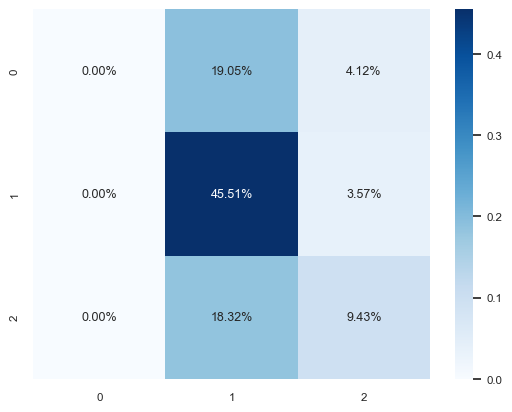

In [85]:
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [83]:
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score
multilabel_confusion_matrix(resultados_Y['Real'], resultados_Y['Predictions'])

array([[[839,   0],
        [253,   0]],

       [[148, 408],
        [ 39, 497]],

       [[705,  84],
        [200, 103]]])

In [147]:
resultados_Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (E,)              468 non-null    float64
 1   (L,)              468 non-null    float64
 2   (V,)              468 non-null    float64
 3   (Real,)           468 non-null    object 
 4   (Predictions,)    468 non-null    object 
 5   (Doble Opcion1,)  468 non-null    object 
 6   (Doble Opcion2,)  468 non-null    object 
 7   (Aciertos,)       468 non-null    int64  
 8   (Apuntes Real,)   468 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 33.0+ KB


In [48]:
# Errores
VA_tabla = resultados_Y.copy()
VA_tabla.to_csv('VA_tabla.csv',index=False)

In [49]:
resultados_Y['Doble Opcion2'].value_counts()

(Doble Opcion2,)
LE                  402
LV                  278
L                   225
VL                   90
VE                   66
V                    31
dtype: int64

In [50]:
Va_tabla1 = pd.read_csv('VA_tabla.csv')
Va_tabla1 = Va_tabla1[(Va_tabla1['Apuntes Real'] == 'VA')]
Va_tabla1

,E,L,V,Real,Predictions,Doble Opcion1,Doble Opcion2,Aciertos,Apuntes Real
7,0.259407,0.529713,0.210881,V,L,LE,LE,0,VA
12,0.155134,0.754153,0.090713,V,L,L,L,0,VA
14,0.258915,0.447660,0.293425,E,L,LE,LV,0,VA
19,0.263508,0.513712,0.222780,V,L,LE,LE,0,VA
20,0.228646,0.538007,0.233347,E,L,LE,LV,0,VA
...,...,...,...,...,...,...,...,...,...
1070,0.294513,0.437466,0.268021,V,L,LE,LE,0,VA
1076,0.275538,0.429519,0.294943,E,L,LE,LV,0,VA
1083,0.275681,0.371422,0.352898,E,L,LE,LV,0,VA
1085,0.294575,0.367933,0.337492,E,L,LE,LV,0,VA


In [51]:
Va_tabla1['Doble Opcion2'].value_counts()

LE    99
LV    71
L     60
VL    24
VE    13
V     10
Name: Doble Opcion2, dtype: int64

In [52]:
Reparto_errores = pd.DataFrame(list(zip(resultados_Y['Doble Opcion2'].value_counts(),Va_tabla1['Doble Opcion2'].value_counts())),columns=['Reparto Pred','Nª Errores'])
Reparto_errores['% Errores'] = round(Reparto_errores['Nª Errores']/Reparto_errores['Reparto Pred'],2)
Reparto_errores

,Reparto Pred,Nª Errores,% Errores
0,402,99,0.25
1,278,71,0.26
2,225,60,0.27
3,90,24,0.27
4,66,13,0.20
5,31,10,0.32


In [53]:
resultados_Y['Real'].value_counts()

(Real,)
L          536
V          303
E          253
dtype: int64

In [54]:
resultados_Y['Predictions'].value_counts()

(Predictions,)
L                 905
V                 187
dtype: int64

In [55]:
905/len(resultados_Y)

0.8287545787545788

# Mi mayor fallo... mi predicción recae mucho sobre el Local. 

In [155]:
36*4

144

In [21]:
model.classes_

array(['E', 'L', 'V'], dtype=object)